# Aggregations: Min, Max, and Everything In Between

In [ ]:
import numpy as np

In [ ]:
L = np.random.random(100)

In [ ]:
sum(L) - np.sum(L)

In [ ]:
L = np.random.random(100000)

%timeit sum(L)
%timeit np.sum(L) 

In [ ]:
%timeit min(L)
%timeit np.min(L)

## Multi dimensional aggregates¶
One common type of aggregation operation is an aggregate along a row or column

In [ ]:
M = np.random.random((3,4))
M

for a bi-dimensional array returns the aggregate over the entire array --> max min

In [ ]:
M.max(), '  ', M.sum(), '  ', np.add.reduce(M),'  ', np.add.reduce(M,axis=1)

#### REMINDER of computations and aggregates (previous notebook)
- How can I reproduce the .sum() of multi-dimensional, aggregating add ?
- add.accumulate(axix=0) adds elements along vertical axis returning **partial** sums
- add.reduce(axix=0) adds elements along vertical axis returning the **final** sums

In [ ]:
M.sum(),'  ', np.add.accumulate(M),  '  ', np.add.reduce(M),  '  ', np.add.reduce(M,axis=1)

- you can reproduce the .sum() by reducing twice, along the two axes

In [ ]:
%timeit M.sum()
%timeit np.add.reduce(np.add.reduce(M))

Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. 

In [ ]:
M.sum(axis=0), 'which is the same as', np.add.reduce(M)

### Other aggregation functions

In [ ]:
M.prod(), '   ', M.prod(axis=1)

In [ ]:
M.std()

In [ ]:
M.argmin()

## president height exercise

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('data/president_heights.csv')
data.head(2)

In [ ]:
# extract one column from dataframe into series
heights_series = data['height(cm)']
# extract one column from dataframe into ndarray
heights = np.array(data['height(cm)'])

print(type(heights_series),' ',type(heights))
print()
print(heights)

In [ ]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

# Selectors for ndarrays
two versions of a given selection: with the explicit function and the symbolic

In [ ]:
test = np.array([1,2,20,3,4,5,20,6,7,20])
test==20

In [ ]:
np.equal(test,20)

In [ ]:
selection = test==20

In [ ]:
np.argwhere(selection)

# argmax when there's more than one instance of max element

In [ ]:
# NOOO THIS IDEA OF REMOVING ELEMENTS GIVES WRONG INDICES
def argmax_BAD(u):
    tmp      = list()
    print('initial array is: ',u)
    
    maxindex = u.argmax()
    maxvalue = u[maxindex]
    tmp.append(maxindex)
    print('tmp is: ',tmp)
    v   = np.delete(u,maxindex)
    
    print(v,'(purged) maxvalue was ',maxvalue,' at location: ',maxindex)

    while maxvalue in v:
        maxi = v.argmax()
        maxv = v[maxi]
        tmp.append(maxi)
        print('tmp is: ',tmp)
        v   = np.delete(v,maxi)
        print(v,'(purged) maxvalue was ', maxv,' at location: ',maxi)
        print(tmp)
        
    return tmp


# prototype of decorator function
def add_comments(func):
    # https://realpython.com/primer-on-python-decorators/#decorating-functions-with-arguments
    # if the function to be decorated has argument --> use the generic interface
    def wrapper(*args, **kwargs):
        print("Something is happening before the function is called.\n")
        print('dec: initial array is: ',args[0])
        func(*args, **kwargs,verb=True)
        # https://realpython.com/primer-on-python-decorators/#returning-values-from-decorated-functions
        print("Something is happening after the function is called.\n")
        # when the decorated function has a return statement, REMEMBER TO RETURN IT in the decorated version, too
        return func(*args, **kwargs)
    return wrapper

# @add_comments
def argmax_multi_lean(u,verb=False):
    
    maxindex = u.argmax()
    maxvalue = u.flatten('K')[maxindex]
    # by flattening we can find all indices corresponding to the max value
    toreturn = np.argwhere(u.flatten('K')==maxvalue)
    # Find the indices of array elements that are non-zero, grouped by element
    # argwhere: docs.scipy.org/doc/numpy/reference/generated/numpy.argwhere.html
    
    if verb:
        print('\n\ninitial array is: ',u)
        print('max found at position: ',maxindex)
        print('flattened is: %s'%u.flatten('K'))
        # also for multi-dimensional ndarrays, the argmax returned is consistent with flattening 'K'-style
        print('maxvalue is %s at location %s'%(maxvalue,maxindex))
        print('returning: %s\n'%toreturn.flatten('K'))

    return toreturn.flatten('K')

argmax_multi = add_comments(argmax_multi_lean)

In [ ]:
test = np.array([1,2,20,3,4,5,20,6,7,20])
print('indices of max value are: ',argmax_multi(test))

In [ ]:
mat = test.reshape(5,2)
mat

In [ ]:
print('the outcome is: ')
print(argmax_multi_lean(mat))
print('outcome printed')

In [ ]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())
print("Maximum heightS:    ", heights[argmax_multi_lean(heights)] )
print("Maximum height president-id's:    ", argmax_multi_lean(heights))

In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

In [ ]:
# https://towardsdatascience.com/top-3-pandas-functions-you-dont-know-about-probably-5ae9e1c964c8

# Broadcasting

In [ ]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
a+b

In [ ]:
a+5

broadcasting a 3x3 with a (1,3)

In [ ]:
M=np.ones((3,3))
M+a

broadcasting a 3x3 wiht a (3,1) 

In [ ]:
c=a.reshape(3,1)
c

In [ ]:
M+c

In [ ]:
d = np.arange(3)
e = d[:,np.newaxis]
e, '  ', d

In [ ]:
e+d

In [ ]:
(d+e) - (e+d)

## This is how broadcasting works
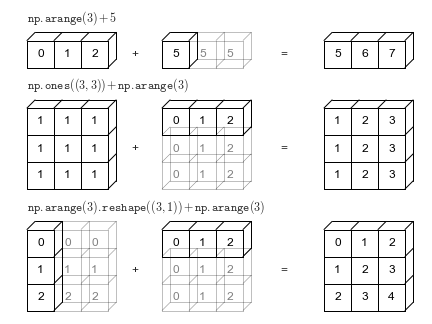

## Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

-- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with 1's on its leading (left) side.

-- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.

-- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised. 

In [ ]:
M = np.ones((2,3))
a = np.ones(3)
M+a

# Broadcasting in Practice
- centering an array

In [ ]:
x = np.random.random((3,10))
x

In [ ]:
# we subract the average computed along the 0th axis

#   - mean being computed "along axis 0", 

#     i.e. for any fixed valie of 1st coordhardinate, running over the 0st coordinate
#   - in other words, set one axis, the RESULTS will be according to OTHER coordinate

x.mean(0), ' shape of mean is:', x.mean(0).shape

In [ ]:
# broadcastng which happems here:

# - x.shape      --> (3,10)
# - x.mean.shape --> (10,)

# - x.mean is promoted to (1,10), per broadcasting 1st rule
# - then x.mean is stretched to (3,10) per 2nd rule

zero_average = x - x.mean(0)
zero_average

In [ ]:
# we check behaviour using the sum as aggregator
# the shape of zero_average is (3,10)
# we sum "along axis 0", which means, 
# for ten times we sum three elements
# which will return ten times approx(0)
zero_average.sum(axis=0)

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]


z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

print('x shape:', x.shape)
print('y shape:',y.shape)
print('z shape:',z.shape)

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();